## 数据集封装器（Dataset Wrappers）的使用

### 一、模块内容

`Datasets` 中的子包为一些流行的音频数据集提供包装，以使它们更易于使用。

Two base class [`pyroomacoustics.datasets.base.Dataset`](https://pyroomacoustics.readthedocs.io/en/pypi-release/pyroomacoustics.datasets.base.html#pyroomacoustics.datasets.base.Dataset "pyroomacoustics.datasets.base.Dataset") and [`pyroomacoustics.datasets.base.Sample`](https://pyroomacoustics.readthedocs.io/en/pypi-release/pyroomacoustics.datasets.base.html#pyroomacoustics.datasets.base.Sample "pyroomacoustics.datasets.base.Sample") wrap together the audio samples and their meta data. The general idea is to create a sample object with an attribute containing all metadata. Dataset objects that have a collection of samples can then be created and can be filtered according to the values in the metadata.

`Datasets` 主要包括两个基类 `Dataset` 和 `Sample`，这两个基类将音频样本及其元数据封装在一起：

- [`pyroomacoustics.datasets.base.Dataset`](https://pyroomacoustics.readthedocs.io/en/pypi-release/pyroomacoustics.datasets.base.html#pyroomacoustics.datasets.base.Dataset "pyroomacoustics.datasets.base.Dataset")
- [`pyroomacoustics.datasets.base.Sample`](https://pyroomacoustics.readthedocs.io/en/pypi-release/pyroomacoustics.datasets.base.html#pyroomacoustics.datasets.base.Sample "pyroomacoustics.datasets.base.Sample")

**其主要思想：**是创建一个包含所有元数据属性的样本对象。然后，就可以创建一个包含一系列样本的数据集对象，并可以根据元数据中的值进行过滤了。

Many of the functions with `match` or `filter` will take an arbitrary number of keyword arguments. The keys should match some metadata in the samples. Then there are three ways that match occurs between a `key/value` pair and an `attribute` sharing the same key.

许多带有 `match` 或 `filter` 的函数将采用任意数量的关键字参数。键应与采样样本中的某些元数据匹配。然后，在键/值对与共享一个键的属性之间具有以下三种匹配方式：

1. `value == attribute`
2. `value` is a list and `attribute in value == True`
3. `value` is a callable (a function) and `value(attribute) == True`

### 二、示例

#### 2.1 例子1：自定义数据

In [1]:
import pyroomacoustics as pra
import IPython

from pyroomacoustics.datasets.base import Dataset, Sample

In [2]:
# # 准备一个自定义的抽样数据
# samples = [
#     # 数据1
#     {
#         'data'    : 0.99,
#         'metadata': {
#             'speaker': 'alice',
#             'sex'    : 'female',
#             'age'    : 37,
#             'number' : 'one'
#         },
#     },

#     # 数据2
#     {
#         'data'    : 2.1,
#         'metadata': {
#             'speaker': 'alice',
#             'sex'    : 'female',
#             'age'    : 37,
#             'number' : 'two'
#         },
#     },

#     # 数据3
#     {
#         'data'    : 1.02,
#         'metadata': {
#             'speaker': 'bob',
#             'sex'    : 'male',
#             'age'    : 48,
#             'number' : 'one'
#         },
#     },

#     # 数据4
#     {
#         'data'    : 2.07,
#         'metadata': {
#             'speaker': 'bob',
#             'sex'    : 'male',
#             'age'    : 48,
#             'number' : 'two'
#         },
#     },
# ]

# corpus = Dataset()

# for s in samples:
#     new_sample = Sample(s['data'], **s['metadata'])
#     corpus.add_sample(new_sample)

# # 然后，查看corpus的数据信息
# # print(corpus)

# # print('Number of samples:', len(corpus))

# # print(corpus[2])

# corpus_male_only = corpus.filter(sex='male')

# print(len(corpus_male_only))

#### 2.2 例子2：CMU ARCTIC数据集

The dataset contains 1131 samples.
Metadata attributes are:
  speaker (1) :
      * bdl occurs 1131 times
  tag (1131) :
      * a0001 occurs 1 times
      * a0002 occurs 1 times
      * a0003 occurs 1 times
      ...
      * a0004 occurs 1 times
      * a0005 occurs 1 times
      * a0006 occurs 1 times
  text (1131) :
      * Author of the danger trail, Philip Steels, etc. occurs 1 times
      * Not at this particular case, Tom, apologized Whittemore. occurs 1 times
      * For the twentieth time that evening the two men shook hands. occurs 1 times
      ...
      * Lord, but I'm glad to see you again, Phil. occurs 1 times
      * Will we ever forget it. occurs 1 times
      * God bless 'em, I hope I'll go on seeing them forever. occurs 1 times
  sex (1) :
      * male occurs 1131 times
  lang (1) :
      * US English occurs 1131 times
  accent (1) :
      * US occurs 1131 times
The first 10 / 1131 samples:
bdl (male, US English/US); a0001: Author of the danger trail, Philip Steels, e

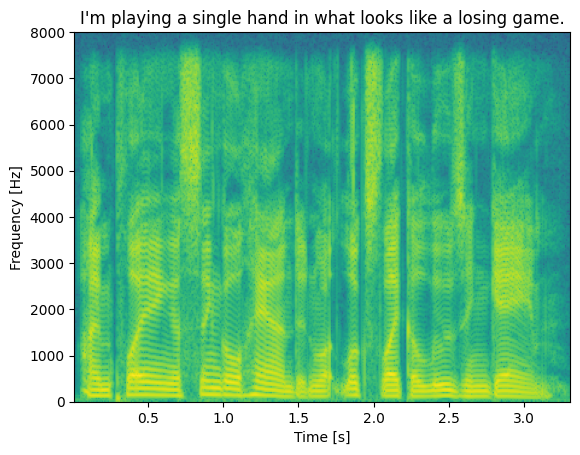

In [ ]:
# This example involves the CMU ARCTIC corpus available at
# http://www.festvox.org/cmu_arctic/

import matplotlib.pyplot as plt
# from pyroomacoustics.datasets.base import 

# Here, the corpus for speaker bdl is automatically downloaded
# if it is not available already
corpus = pra.datasets.CMUArcticCorpus(download=True, speaker=['bdl'])

# print dataset info and 10 sentences
print(corpus)
corpus.head(n=10)

# let's extract all samples containing the word 'what'
keyword = 'what'
matches = corpus.filter(text=lambda t : keyword in t)
print('The number of sentences containing "{}": {}'.format(keyword, len(matches)))
for s in matches.sentences:
    print('  *', s)

# if the sounddevice package is available, we can play the sample
# matches[0].play()

# show the spectrogram
plt.figure()
matches[0].plot()
plt.show()


#### 2.3 例子3：Google’s Speech Commands Dataset

Dataset exists! Using ./google_speech_commands
The dataset contains 306 samples.
Metadata attributes are:
  word (31) :
      * dog occurs 10 times
      * up occurs 10 times
      * eight occurs 10 times
      ...
      * marvin occurs 10 times
      * two occurs 10 times
      * six occurs 10 times
  speech (2) :
      * True occurs 300 times
      * False occurs 6 times
  file_loc (306) :
      * ./google_speech_commands/dog/063d48cf_nohash_0.wav occurs 1 times
      * ./google_speech_commands/dog/ef2a3cfb_nohash_0.wav occurs 1 times
      * ./google_speech_commands/dog/ec7d1151_nohash_2.wav occurs 1 times
      ...
      * ./google_speech_commands/dog/8d4cdc60_nohash_0.wav occurs 1 times
      * ./google_speech_commands/dog/8442ea62_nohash_1.wav occurs 1 times
      * ./google_speech_commands/dog/7846fd85_nohash_0.wav occurs 1 times
  noise_type (6) :
      * doing_the_dishes occurs 1 times
      * pink_noise occurs 1 times
      * dude_miaowing occurs 1 times
      * running_tap o

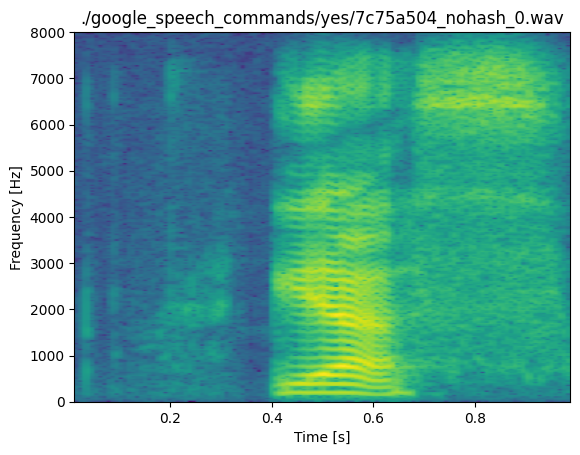

In [4]:
# This example involves Google's Speech Commands Dataset available at
# https://research.googleblog.com/2017/08/launching-speech-commands-dataset.html

import matplotlib.pyplot as plt
import pyroomacoustics as pra

# The dataset is automatically downloaded if not available and 10 of each word is selected
dataset = pra.datasets.GoogleSpeechCommands(download=True, subset=10, seed=0)

# print dataset info, first 10 entries, and all sounds
print(dataset)
dataset.head(n=10)
print("All sounds in the dataset:")
print(dataset.classes)

# filter by specific word
selected_word = 'yes'
matches = dataset.filter(word=selected_word)
print("Number of '%s' samples : %d" % (selected_word, len(matches)))

# if the sounddevice package is available, we can play the sample
matches[0].play()

# show the spectrogram
plt.figure()
matches[0].plot()
plt.show()